In [3]:
!mkdir data

def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')
    
    
    data = np.load('data/' + c + '.npy')
    data = data[:int(0.05 * len(data))]
    np.save('data/' + c + '.npy', data)
    
    
download()


mkdir: cannot create directory ‘data’: File exists
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwat

In [3]:
all_files = glob.glob(os.path.join('data', '*.npy'))

print(len(all_files))
numImages = 0

for i in all_files:
    data = np.load(all_files[0])
    numImages += data.shape[0]

print(numImages)

100
644200


42591


ValueError: can only convert an array of size 1 to a Python scalar

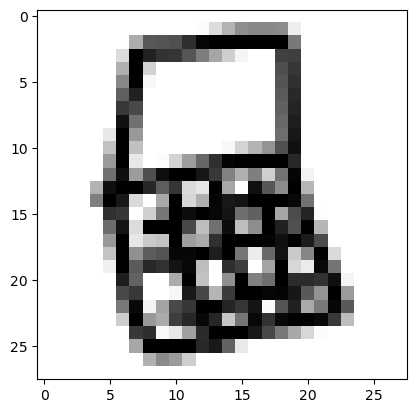

In [17]:
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline  
idx = randint(0, len(x_train))
print(idx)
plt.imshow(x_train[idx].reshape(28,28), cmap=plt.cm.binary) 
print(class_names[int(y_train[idx].item())])

In [9]:
model = keras.Sequential() #empty sequential model


#add layers

model.add(layers.Convolution2D(16, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Convolution2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Convolution2D(64, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Convolution2D(128, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Flatten()) #converts output of previous layer into 1d array
model.add(layers.Dense(256, activation='relu')) #dense maps each input layer to the output
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

#train model
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


2023-04-09 20:49:44.857434: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

print(predictions)

1250/1250 [==============================] - 11s 9ms/step
[[0.00989414 0.01048165 0.00994815 ... 0.00989398 0.01040748 0.00989972]
 [0.00983209 0.0098318  0.00983183 ... 0.00983191 0.0098318  0.00983189]
 [0.00987016 0.00986525 0.00986532 ... 0.00986512 0.00986575 0.00986518]
 ...
 [0.00988324 0.00990783 0.00988897 ... 0.00988324 0.00992662 0.00988324]
 [0.00983209 0.00983192 0.00983192 ... 0.02659023 0.00983192 0.00983192]
 [0.00991222 0.00993962 0.00993087 ... 0.00990228 0.00990772 0.01010832]]


In [14]:
originalTestImages[0].shape

(784,)

(40000, 28, 28, 1)
(1, 28, 28, 1)


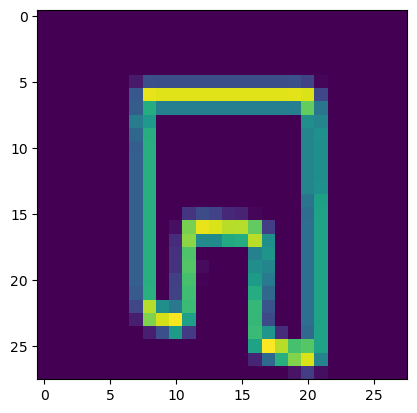

In [101]:
from PIL import Image

image = Image.open('pants.png')

image = image.resize((28, 28))
image = Image.eval(image, lambda x: 255 - x)


imgArr = np.asarray(image).astype('float32')
imgArr /= 255.0
imgArr = imgArr[:, :, 2:3]
imgArr = np.expand_dims(imgArr, axis=0)


image.show()

print(x_test.shape)
print(imgArr.shape)

plt.imshow(imgArr.reshape(28,28))

In [17]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [20]:
!pip install tensorflowjs 
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

!zip -r model.zip model 

from google.colab import files
files.download('model.zip')

SyntaxError: invalid syntax (1688856601.py, line 7)